In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data=pd.read_csv("test.csv")

In [90]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [92]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [93]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [95]:
data = data.dropna(subset=["Embarked"])
data["Cabin"] = data["Cabin"].fillna("Unknown")
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [96]:
print(data.columns.tolist())

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [97]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [98]:
data.duplicated().sum()

np.int64(0)

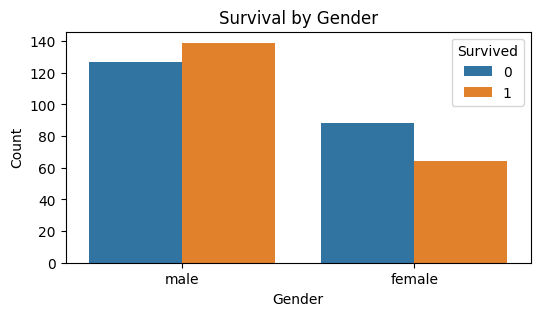

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'data' is your DataFrame loaded from test.csv
data["Survived"] = np.random.randint(0, 2, size=len(data))

plt.figure(figsize=(6, 3))
sns.countplot(data=data, x="Sex", hue="Survived")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", loc="upper right")
plt.show()

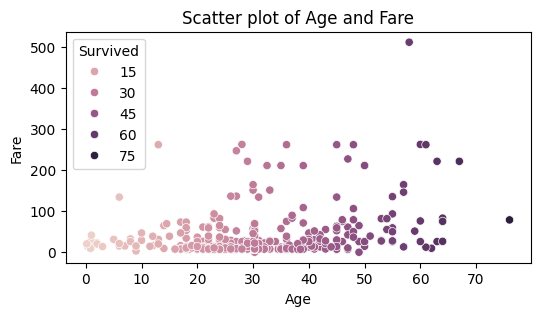

In [100]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x="Age",y="Fare", hue="Age")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

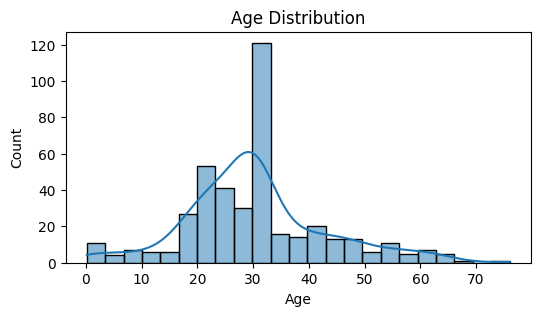

In [101]:
plt.figure(figsize=(6, 3))
sns.histplot(data["Age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

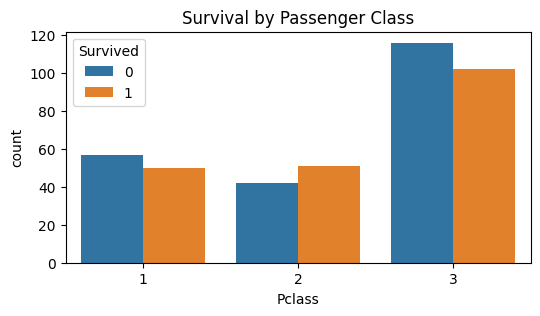

In [102]:
plt.figure(figsize=(6, 3))
sns.countplot(data=data, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.show()


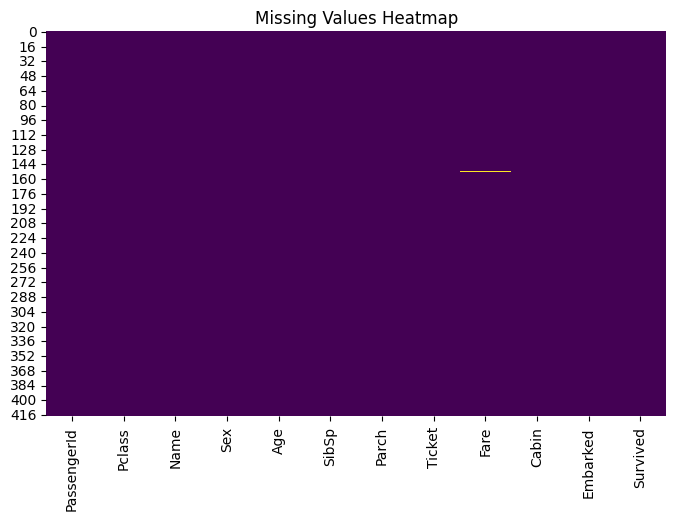

In [103]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


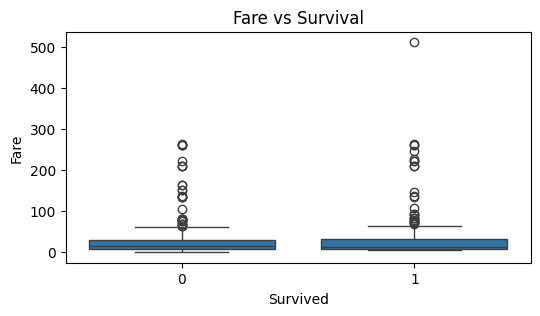

In [104]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x="Survived", y="Fare")
plt.title("Fare vs Survival")
plt.show()


In [105]:
survival_rate = data.groupby("Pclass")["Survived"].mean() * 100
print(survival_rate)


Pclass
1    46.728972
2    54.838710
3    46.788991
Name: Survived, dtype: float64


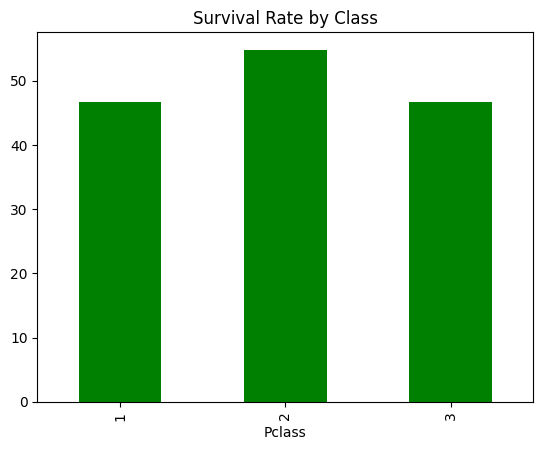

In [106]:
survival_rate.plot(kind="bar", color="green", title="Survival Rate by Class")
plt.show()
